<a href="https://colab.research.google.com/github/mcmejiag14/Deep-Learning/blob/main/Code(Without_Autotune).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Convolutional Neural Networks for a gene DataSet**

First we import all the packages needed. We import Numpy,ensorFlow, and Keras. We import pathlib to could read the data and matplotlib to could do plots. 

In [1]:
import numpy as np 
import tensorflow as tf 
from tensorflow.keras import layers 
from tensorflow.keras.callbacks import EarlyStopping 
import pathlib 
import matplotlib.pyplot as plt 

Now, we are going to connect google drive with the document to could read the data easily.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Now, we import the Data. The data set consist of images of ITFI3 genes, which is divided in four classes, Control, Tat+ cART, cART, and Tat+10.

In [4]:
data_dir = '/content/drive/MyDrive/Data 2' 
data_dir = pathlib.Path(data_dir) 

Then, we are going to train the model. We are going to choose 10% for Validation and 90% for Training.

This part of the code creates the training through the function tf.keras.preprocessing.image_dataset_from_directory. Then choosing the parameters, we specify the size of the images, in this case will be 256x256 pixels and also the batch size which we choose to be 128.



In [11]:
trainmodel = tf.keras.preprocessing.image_dataset_from_directory(data_dir, 
    validation_split=0.1, 
    subset="training",  
    seed=123, image_size=(256, 256), 
    batch_size=128) 

Found 18 files belonging to 4 classes.
Using 17 files for training.


Now, we define the variable called validation. We use the same parameters as before.

In [18]:
valmodel = tf.keras.preprocessing.image_dataset_from_directory(data_dir, 
     validation_split=0.1, 
     subset="validation", 
     seed=123, 
     image_size=(256, 256), 
     batch_size=128)

Found 18 files belonging to 4 classes.
Using 3 files for validation.


In [19]:
class_names = trainmodel.class_names
print(class_names)

['Control', 'Tat + cART', 'Tat 10', 'cART']


In [20]:
model = tf.keras. Sequential([ 
    layers.experimental.preprocessing. Rescaling(1./255), 
    layers.Conv2D(32, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(), 
    #layers.Dropout (0.2),

  
    layers.Conv2D(16, 3, padding='same', activation='relu'), 
    layers.MaxPooling2D(), 
    layers.Dropout(0.1),
 
    layers.Flatten (), layers. Dense(128, activation='relu'), 
    layers.Dense (64, activation='relu'), 
    layers.Dense(16, activation='relu'),

    layers.Dense(4) # number of classes
    ]) 

In [21]:
model.compile (optimizer='adam', loss=tf.losses. SparseCategoricalCrossentropy (from_logits=True), metrics=['accuracy'])
history = model.fit(trainmodel, validation_data=valmodel, epochs=200) 

Epoch 1/200
1/1 [==============================] - 4s 4s/step - loss: 1.3837 - accuracy: 0.2941 - val_loss: 1.0238 - val_accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 2s 2s/step - loss: 1.1817 - accuracy: 0.4118 - val_loss: 0.9075 - val_accuracy: 0.6667
Epoch 3/200
1/1 [==============================] - 2s 2s/step - loss: 0.8582 - accuracy: 0.7059 - val_loss: 0.9962 - val_accuracy: 0.6667
Epoch 4/200
1/1 [==============================] - 2s 2s/step - loss: 0.6120 - accuracy: 0.7059 - val_loss: 1.7492 - val_accuracy: 0.6667
Epoch 5/200
1/1 [==============================] - 2s 2s/step - loss: 0.4425 - accuracy: 0.7647 - val_loss: 1.5690 - val_accuracy: 0.3333
Epoch 6/200
1/1 [==============================] - 3s 3s/step - loss: 0.3266 - accuracy: 0.8235 - val_loss: 1.5029 - val_accuracy: 0.6667
Epoch 7/200
1/1 [==============================] - 1s 1s/step - loss: 0.2826 - accuracy: 0.8235 - val_loss: 1.3231 - val_accuracy: 0.6667
Epoch 8/200
1/1 [=================

In [22]:
y_vloss = history.history['val_loss'] 
y_loss = history.history['loss'] 
y_acc = history.history['accuracy'] 
y_vacc = history.history['val_accuracy'] 

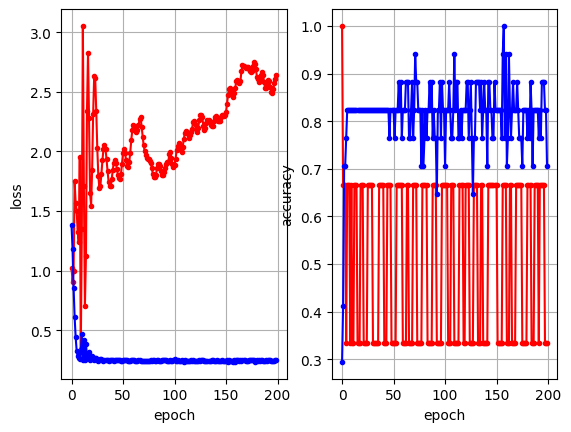

In [23]:
fig, (ax1, ax2) = plt.subplots (1, 2) 
ax1.plot(np.arange (len (y_vloss)), y_vloss, marker='.', c='red') 
ax1.plot(np.arange (len (y_loss)), y_loss, marker='.', c='blue') 
ax1.grid() 
plt.setp(ax1, xlabel='epoch', ylabel='loss')

ax2.plot(np.arange (len (y_vacc)), y_vacc, marker='.', c='red') 
ax2.plot(np.arange (len (y_acc)), y_acc, marker='.', c='blue') 
ax2.grid() 
plt.setp(ax2, xlabel='epoch', ylabel='accuracy') 

plt.show()